## KMeans clustering 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd


### let's get some data

In [2]:
from sklearn import datasets

In [3]:
data = datasets.load_wine()

In [ ]:
#explore the data 

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [53]:
print(data['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [12]:
data['data'].shape

(178, 13)

In [13]:
# create data frame from data['data'], columns=data['feature_names']
X=pd.DataFrame(data['data'],columns=data['feature_names'])


In [14]:
# what data types do you have?
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [17]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


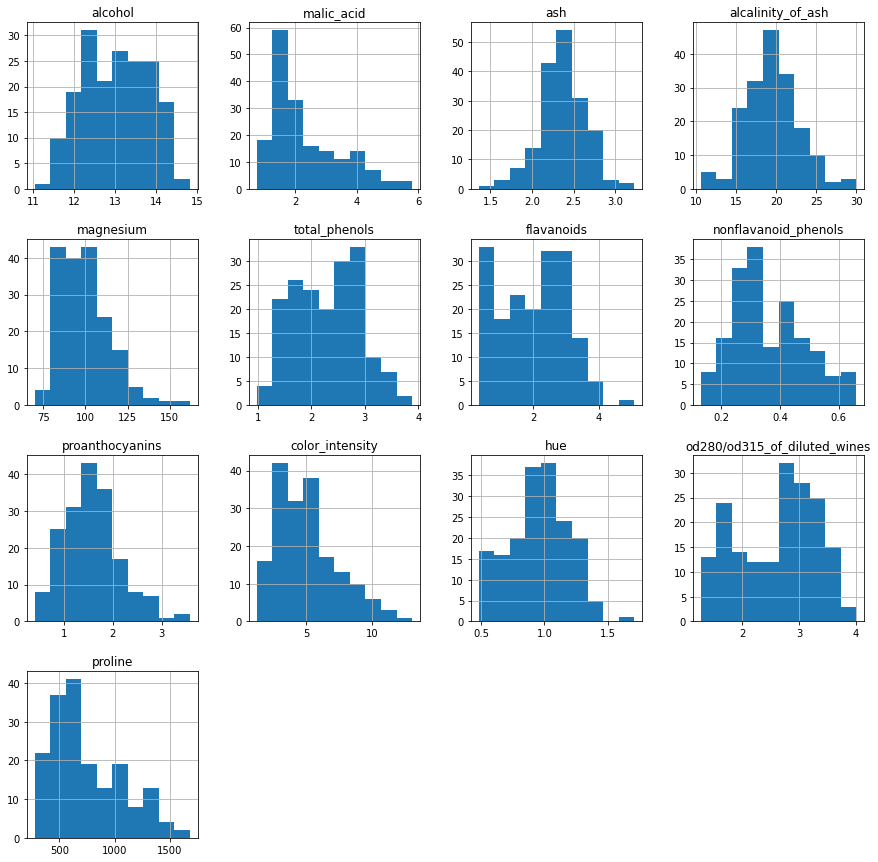

In [22]:
X.hist(figsize=(15,15));

### Preparing the data
The scale of "proline" is much higher than the scale of many other variables! K-Means is a distance based algorithm: we need to scale / normalize

Check out the docs for standardScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Explore other methods for normalizing data: https://scikit-learn.org/stable/modules/preprocessing.html

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
# scale your data with the standard scaler

X_prep = StandardScaler().fit_transform(X)

In [25]:
# create a dataframe of scaled features
X_prep_df = pd.DataFrame(X_prep, columns=data['feature_names'])

X_prep_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


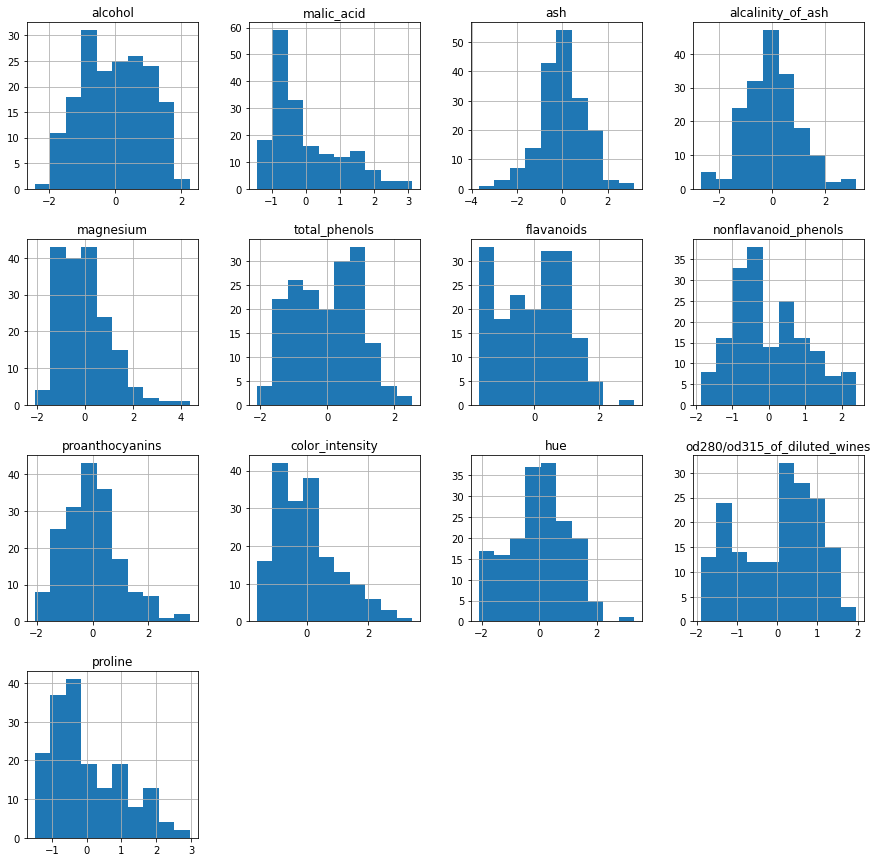

In [26]:
X_prep_df.hist(figsize=(15,15));

### Clustering 

We will pick manually the number of clusters we want - let's set it to 8. Later we will discuss how many clusters we should have.

When randomness is involved, we better use a random seed so that we can reproduce our results. We can set this directly to the argument random_state.

In [27]:
from sklearn.cluster import KMeans

#define the model, fit the model to your data 

kmeans = KMeans(n_clusters=8, random_state=40)
kmeans.fit(X_prep)

KMeans(random_state=40)

In [28]:
#look at the cluster centres 
kmeans.cluster_centers_

array([[ 0.51990082, -0.44779775,  1.23178828,  0.19069784,  0.85368377,
         0.77214377,  0.90279733, -0.14386353,  0.19903873, -0.03075135,
         0.76361877,  0.67771069,  0.95887253],
       [ 0.36427873,  1.1061655 ,  0.36818248,  0.76258543, -0.01575107,
        -0.89334174, -1.20091107,  0.69359259, -0.48188763,  1.6158039 ,
        -1.43511872, -1.3758594 , -0.36620629],
       [ 1.11464751, -0.33880446, -0.00801444, -1.06002973,  0.39957425,
         1.02596175,  1.0831179 , -0.78369688,  0.77881284,  0.37166734,
         0.34439077,  0.87142532,  1.30624055],
       [-0.63780716, -0.73665292, -1.51554854, -0.38027262, -0.74751474,
        -0.26303871, -0.06093901, -0.45236239, -0.26105022, -0.83609366,
         0.64422048,  0.37763385, -0.72117538],
       [-0.73074614,  0.1601553 , -0.07429984,  0.13021186, -0.52015726,
         0.76245348,  0.64231578, -0.62119261,  0.53990252, -0.75843705,
         0.13654271,  0.66415797, -0.69206001],
       [-1.1976701 , -0.338306

In [29]:
# Predicting / assigning the clusters:
clusters=kmeans.predict(X_prep)

In [30]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    20
1    29
2    37
3    21
4    21
5    19
6     4
7    27
dtype: int64

In [32]:
# Explore the cluster assignment by placing it in the original dataset
X_cluster=pd.DataFrame(X)
X_cluster['cluster']=clusters
X_cluster.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,2
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,2
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,2
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,2


### Time to think : What makes a cluster a "good" cluster?

+ By default Scikit-Learn has tried 10 different random initializations and kept the best model- based on Inertia



* **Inertia**, Intuitively, inertia tells how far away the points within a cluster are. Therefore, a small of inertia is aimed for. The range of inertia’s value starts from zero and goes up.

* **Silhouette score**, (discuss later), -1 to 1


In [33]:
# total inertia of all the centroids
kmeans.inertia_

934.4143951016046

### other parameters 

max_iter: model iterates up to 300 times by default (those are the re-computing centroids iterations we saw earlier)

tol: determine when to stop iterating (if the clusters have changed only veeeery slightly, we assume we have achieved 'convergence')

algorithm: There are variations in the implementation of most algorithms and K-Means is no exception. By default, we're using a 'smart' implementation called elkan.

## Activity 
- For learning purposes, we can tweak the parameters

In [45]:
kmeans = KMeans(n_clusters=50,
                init="random",
                n_init=10,  
                max_iter=200,
                tol=0,
                algorithm="full",
                random_state=40)
kmeans.fit(X_prep)
print(kmeans.inertia_)



379.99537274450284


In [ ]:
# Play with the KMeans parameters and see how that affects the 'inertia' result.

### Finding the optimal number of clusters
We have used K=8 by default for now - but we know that 8 might not be the optimal numbner of clusters for our dataset. Having a metric like inertia, we can compute it for several K values and then use the "elbow method" to choose the best K.

We will now leave all other parameters with their default value, since it seems to work pretty well.

In [48]:
# Try to run Kmeans with all values of K, from 2 to 20
K = range(2, 50)

# For each model, store the inertia in a list
inertia = []

for k in K:
    kmeans=KMeans(n_clusters=k, random_state=40)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)
    
print(inertia)

[1658.758852429096, 1277.928488844643, 1186.5281031256202, 1105.4095090953424, 1051.1760567630524, 978.7027148466277, 934.4143951016046, 908.3311677802266, 848.1453124291604, 821.0085574878432, 793.3897433760696, 762.858068086613, 743.4332915365824, 712.161858348806, 699.9921350062543, 682.9464644263668, 656.0849798527466, 657.8225872411515, 631.4737242361344, 609.1316413098693, 598.2288113100602, 585.8242349544327, 571.4663898423314, 564.8423600906358, 535.5472013138691, 536.6476168835279, 519.8431993055535, 514.4812209277047, 498.811657150242, 493.98042999875815, 477.7583500167863, 464.7294689185208, 458.8458178336751, 451.5081467368938, 446.90412470104974, 437.20930471861914, 420.72227898592905, 410.5848173834411, 418.1857314086775, 409.0011603764193, 393.05029684983106, 384.7366812714751, 377.05185488611886, 368.001604873334, 362.6259498401827, 356.9527870778399, 351.0784843551053, 342.6572511488196]


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

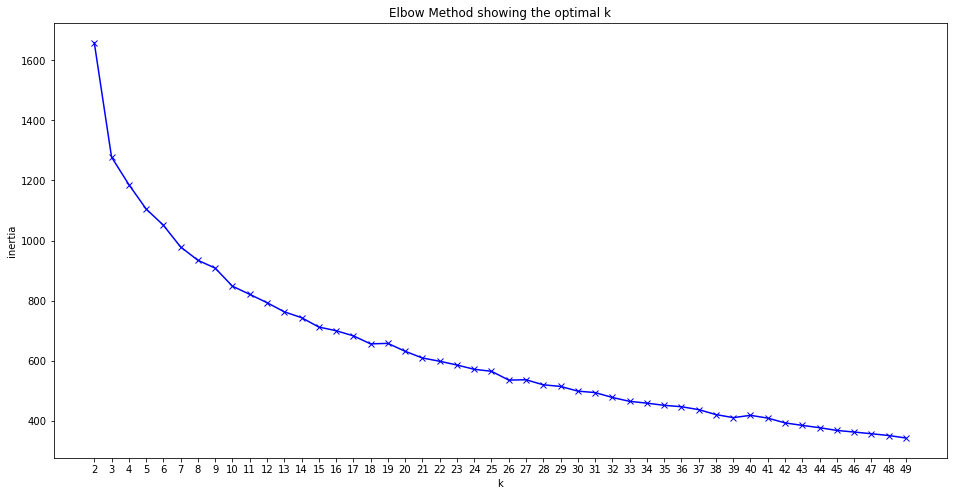

In [49]:
# Plot the results
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Findings: 







+ **Inertia** is the metric that Scikit-Learn optimizes, but it does not have a limited range and that makes it difficult to evaluate.



+ There's another metric called **Silhouette Score**
* what Silhouette score does: **how similar is an observation to its own cluster compared to other clusters**
* $S_i = \frac{(b_i - a_i)}{\text{max}(a_i,b_i)}$
    * `a`: mean intra-cluster distance (the average distance between the i-th observation and every other observation in the cluster where i belongs to)
    * `b`: the mean **nearest** inter cluster distance (the average distance between the i_th observation of the nearest cluster that i is **not part of**)
    
* The **silhouette score for the whole model** is the **average** of all the silhouette scores of each instance.

Well separated clusters:
* `a` - the mean intra cluster distance is relatively small compared to
* `b` - the mean inter cluster distance that the points are not part of
* that means $S = (b - a) / max(a,b)$ approaches 1

Not so well separated clusters:
* `a` - the mean intra cluster distance is not so small (relatively) compared to
* `b` - the mean inter cluster distance that the points are not part of
* that means $S = (b - a) / max(a,b)$ becomes smaller and smaller (approaches 0 when b=a)
* S becomes negative for a point, which is not (yet) in the right cluster (too less iterations? play with tolerance. Or random effect - increase n_init?)

In [51]:
from sklearn.metrics import silhouette_score

K = range(2, 20)

silhouettes = []

for k in K: 
    kmeans=KMeans(n_clusters=k, random_state=40)
    kmeans.fit(X_prep)
    silhouettes.append(silhouette_score(X_prep, kmeans.predict(X_prep)))

In [ ]:
silhouette_score(X_prep, kmeans.predict(X_prep))

comparing each observation to each cluster (and its own cluster)
- could that observation EQUALLY sit in another cluster 

rock song - its sat in a soft rock cluster 
could it also / better sit in a hard rock cluster 

how well does it fit to a cluster AND how bad does it fit to all other clusters

Text(0, 0.5, 'silhouette score')

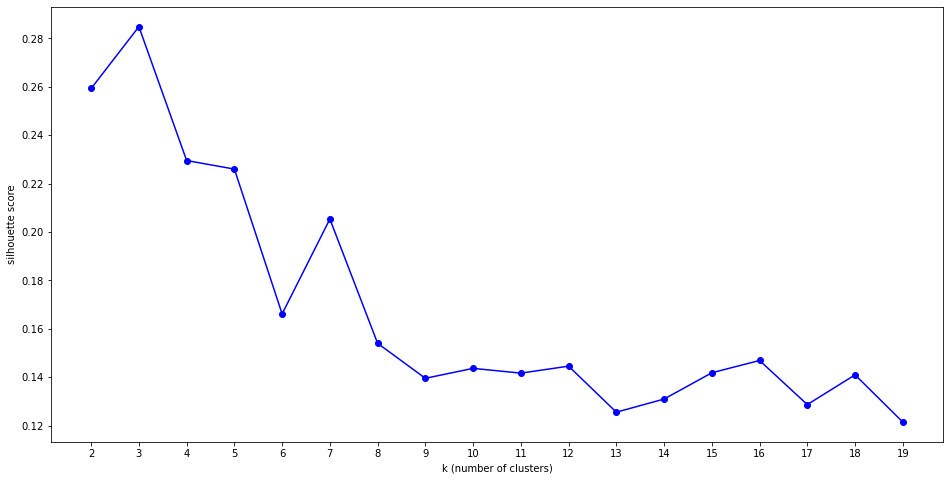

In [52]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.ylabel('silhouette score')

Findings: 
as far as inertia goes i would go with 10 

silhouette says 7, 10 

in conclusion - 10 

(or 3...)


# What next?

It's the moment to perform clustering on the songs you collected. Remember that the ultimate goal of this project is to improve the recommendations of songs. Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The experiments you did with the Spotify API and the Billboard web scraping will allow you to create a pipeline such that when the user enters a song, you:

+ 1. Check whether or not the song is in the Billboard Hot 100.
    + 1.1. If the song is in the Billboard Hot 100, recommend another song from there.
    + 1.2. If the song is not in the Billboard Hot 100, skip to step 2.
    
+ 2. Collect the audio features from that song by sending a requesto to the Spotify API.

+ 3. "Predict" the cluster of the song.

+ 4. Pick a random song from the predicted cluster and give it back to the user.

We want to make sure that clusters make some sense. Besides tuning the parameters of the K-Means algorithm, the most important measure of "performance" is checking whether or not the recommendations given make some sense to you and your classmates - so test and tune before demonstrating your new recommender product 